In [1]:
using SciMLBase
using OrdinaryDiffEq
using ForwardDiff
import ForwardDiff: jacobian

using StaticArrays
using LinearAlgebra
using Statistics

using JLD2
using Dates

using PyPlot

In [2]:
abstract type ODEType end
abstract type AbstractTask end

---
## Загрузка библиотек и модулей

---

In [85]:
include("Utils\\Anon_Utils.jl")
include("Utils\\CallBack_Utils.jl")
include("Utils\\Computation_Utils.jl")
include("Tasks\\ODE_Solving_Task.jl")
include("ODEs\\BS_ODE.jl")
include("Utils\\Visualization_Utils.jl")
include("Utils\\PeriodSync_Utils.jl")
include("Utils\\Session_Utils.jl")


---

## Создание сессии для сохранения результатов

---

In [5]:
#ses = Session("Some Session", Result_Folder_Name = "Test Results")

---

## Исходная система (3 ДУ)

---

In [5]:
ODE_Parameters = Dict("K" => 0.4,
                         "r" => 0.1,
                         "a2" => pi/2,
                         "a4" => pi)

Sngl = BS_ODE_Sngl(ODE_Parameters)

time_span = 10000.0
ic = [2.941592653589793, 0.2, 0.4]

trans_time = 0.0
alg = DP8()
callback = "x -> sin(x[1] - 0.25)"
kwargs = Dict(:dt => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)


ODESolve = ODESolve_Task(Sngl, time_span, ic; trans_time, alg, callback, kwargs)

[ODE::BS_ODE_Sngl]: [K::Float64]: 0.4
[r::Float64]: 0.1
[a2::Float64]: 1.5707963267948966
[a4::Irrational{:π}]: π
[P::Vector{Real}]: Real[-0.4, -0.4, -1.2246467991473532e-16]

[time_span::Float64]: 10000.0
[init_cond::Vector{Float64}]: [2.941592653589793, 0.2, 0.4]
[trans_time::Float64]: 0.0
[alg::DP8]: DP8()
[callback::String]: x -> sin(x[1] - 0.25)
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dt => 0.1)
[solution::Nothing]: nothing


In [5]:
sol = ODESolve()

[t]: 6825-element Vector{Float64}
[y]: 3-element Vector{Vector{Float64}} with size 6825
[t_events]: 1-element Vector{Vector{Float64}} with size 16
[y_events]: 1-element Vector{Matrix{Float64}} with size 16x3
[retcode]: Success


### Time Series

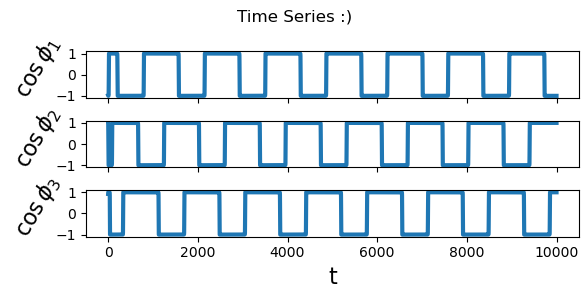

In [9]:
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3"]
title = "Time Series"
plotKwargs = Dict(:linewidth => 3)

TS_properties = Dict("projFunc" => projFunc, "varNames" => varNames, "title" => title, "kwargs" => plotKwargs)
plotTimeSeries(sol; plot_properties = TS_properties);

### Poincare

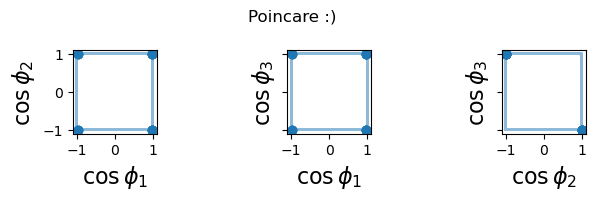

In [10]:
#savePath = "test.png"
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]
title = "Poincare"
plotKwargs = Dict(:linewidth => 1)
showEvents = true
varPairs = [[[0, 1], [0, 2], [1, 2]]]

Pcr_properties = Dict("projFunc" => projFunc,
                     "varNames" => varNames,
                     "title" => title,
                     "showEvents" => showEvents,
                     "varPairs" => varPairs,
                     "kwargs" => plotKwargs)
plotPoincare(sol, plot_properties = Pcr_properties);

### Return time

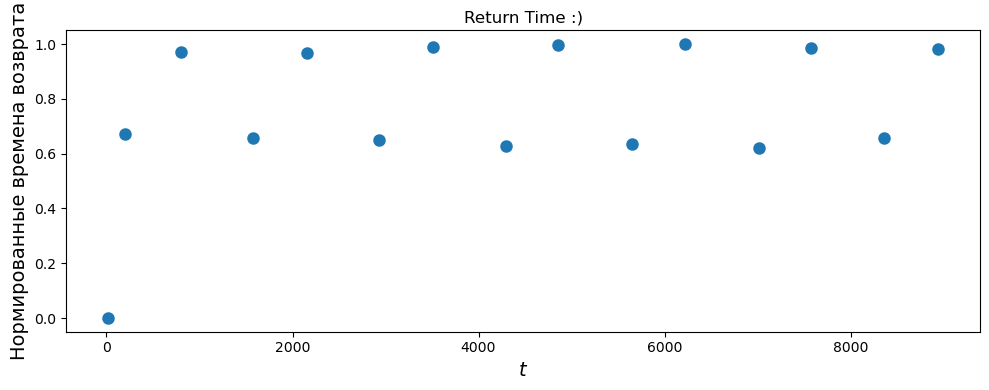

In [11]:
#savePath = "test.png"
normFunc = "normDefault"
title = "Return Time"
plotKwargs = Dict(:linewidth => 3)

RT_properties = Dict("normFunc" => normFunc, "title" => title, "kwargs" => plotKwargs)
plotReturnTime(sol, plot_properties = RT_properties);

---

## Объединенная система (6 ДУ)

---

In [101]:
ODE_Parameters = Dict("K" => 1.5789473684210527,
                         "r" => 0.39473684210526316,
                         "a2" => pi/2,
                         "a4" => 3.24685581148453,
                         "Eps" => 1e-1)
Couple_function = "x -> 1 - cos(x)"
#Couple_function = "x -> 1/(exp(10*cos(x)))"

Duo = BS_ODE_Duo(ODE_Parameters, Couple_function)

time_span = 50.0
ic = [2.941592653589793, 0.2, 0.4, 2.941592653589793, 0.4, 0.2]
#ic = [2.941592653589793, 1.2, 1.4, 2.941592653589793, 0.4, 0.2]
#ic = [3.278216370848396e-14,
#        4.237894430800192e-8,
#        3.141592780256459,
#        3.278216370848396e-14,
#        3.141592780256459,
#        4.237894430800192e-8]

trans_time = 14.0
alg = DP8()
callback = "x -> cos(x[1])"
kwargs = Dict(:dtmax => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)


ODESolve = ODESolve_Task(Duo, time_span, ic; trans_time, alg, callback, kwargs)

[ODE::BS_ODE_Duo]: [Forward_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::Vector{Real}]: Real[-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Backward_ODE::BS_ODE_Sngl]:
[K::Float64]: -1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::Vector{Real}]: Real[1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Eps::Float64]: 0.1
[Couple::AnonFunc]: #236: x -> 1 - cos(x)


[time_span::Float64]: 50.0
[init_cond::Vector{Float64}]: [2.941592653589793, 0.2, 0.4, 2.941592653589793, 0.4, 0.2]
[trans_time::Float64]: 14.0
[alg::DP8{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}]: DP8(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false))
[callback::String]: x -> cos(x[1])
[kwargs::Dict{Symbol, Any}

In [102]:
sol = ODESolve()

[t]: 930-element Vector{Float64}
[y]: 6-element Vector{Vector{Float64}} with size 930
[t_events]: 1-element Vector{Vector{Float64}} with size 7
[y_events]: 1-element Vector{Matrix{Float64}} with size 7x6
[retcode]: Success


### Time Series

In [103]:
#savePath = "test.png"
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]
title = "Time Series"
plotKwargs = Dict(:linewidth => 3)

TS_properties = Dict("projFunc" => projFunc, "varNames" => varNames, "title" => title, "kwargs" => plotKwargs)

Dict{String, Any} with 4 entries:
  "kwargs"   => Dict(:linewidth=>3)
  "varNames" => ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_…
  "projFunc" => "projCos"
  "title"    => "Time Series"

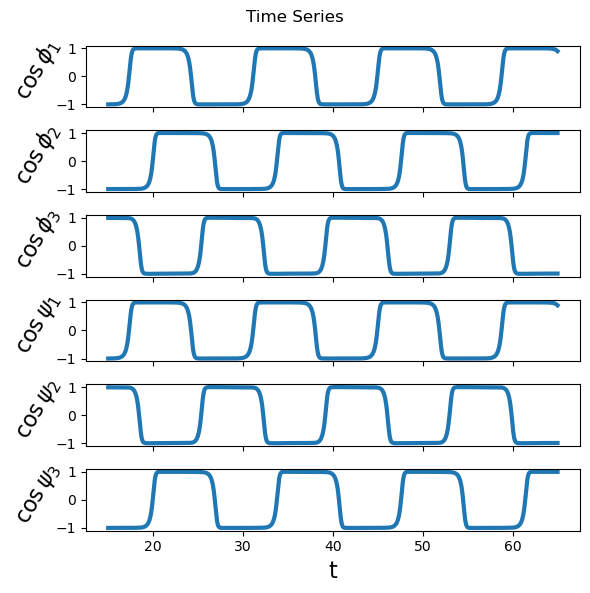

In [100]:
fig = plotTimeSeries(sol; plot_properties = TS_properties);

### Poincare

In [69]:
#savePath = "test.png"
projFunc = "projCos"
varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]
title = "Poincare"
plotKwargs = Dict(:linewidth => 1)
showEvents = true
varPairs = [[[0, 1], [0, 2], [1, 2]],
            [[3, 4], [3, 5], [4, 5]],
            [[0, 3], [0, 4], [0, 5]],
            [[1, 3], [1, 4], [1, 5]],
            [[2, 3], [2, 4], [2, 5]]]

Pcr_properties = Dict("projFunc" => projFunc,
                     "varNames" => varNames,
                     "title" => title,
                     "showEvents" => showEvents,
                     "varPairs" => varPairs,
                     "kwargs" => plotKwargs)

Dict{String, Any} with 6 entries:
  "varPairs"   => [[[0, 1], [0, 2], [1, 2]], [[3, 4], [3, 5], [4, 5]], [[0, 3],…
  "showEvents" => true
  "kwargs"     => Dict(:linewidth=>1)
  "varNames"   => ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\ps…
  "projFunc"   => "projCos"
  "title"      => "Poincare"

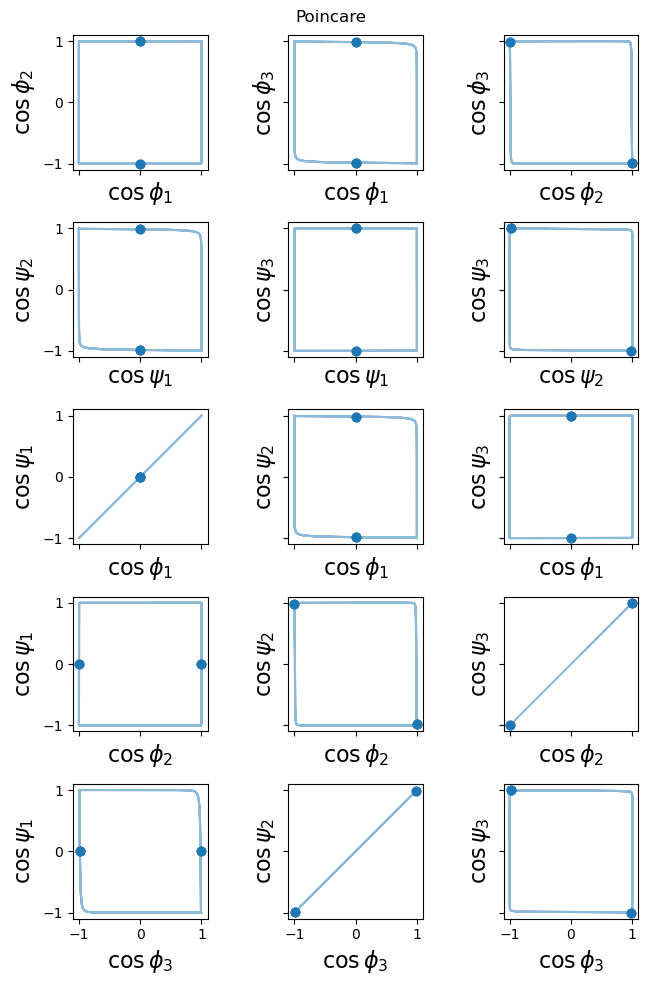

In [70]:
plotPoincare(sol, plot_properties = Pcr_properties);

### Return time

In [71]:
#savePath = "test.png"
normFunc = "normDefault"
title = "Return Time"
plotKwargs = Dict(:linewidth => 3)

RT_properties = Dict("normFunc" => normFunc, "title" => title, "kwargs" => plotKwargs)

Dict{String, Any} with 3 entries:
  "normFunc" => "normDefault"
  "kwargs"   => Dict(:linewidth=>3)
  "title"    => "Return Time"

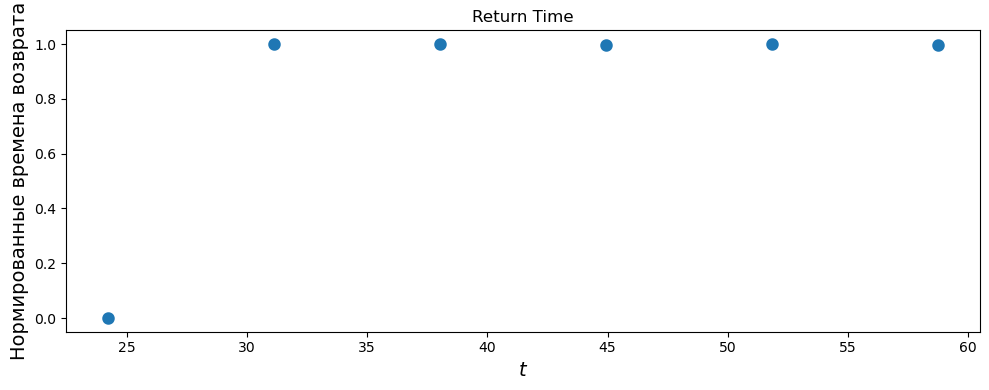

In [72]:
plotReturnTime(sol, plot_properties = RT_properties);

### Activation Diagram

In [73]:
varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]
title = "Activation Diagram"

AD_properties = Dict("varNames" => varNames, "title" => title)

Dict{String, Any} with 2 entries:
  "varNames" => ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_…
  "title"    => "Activation Diagram"

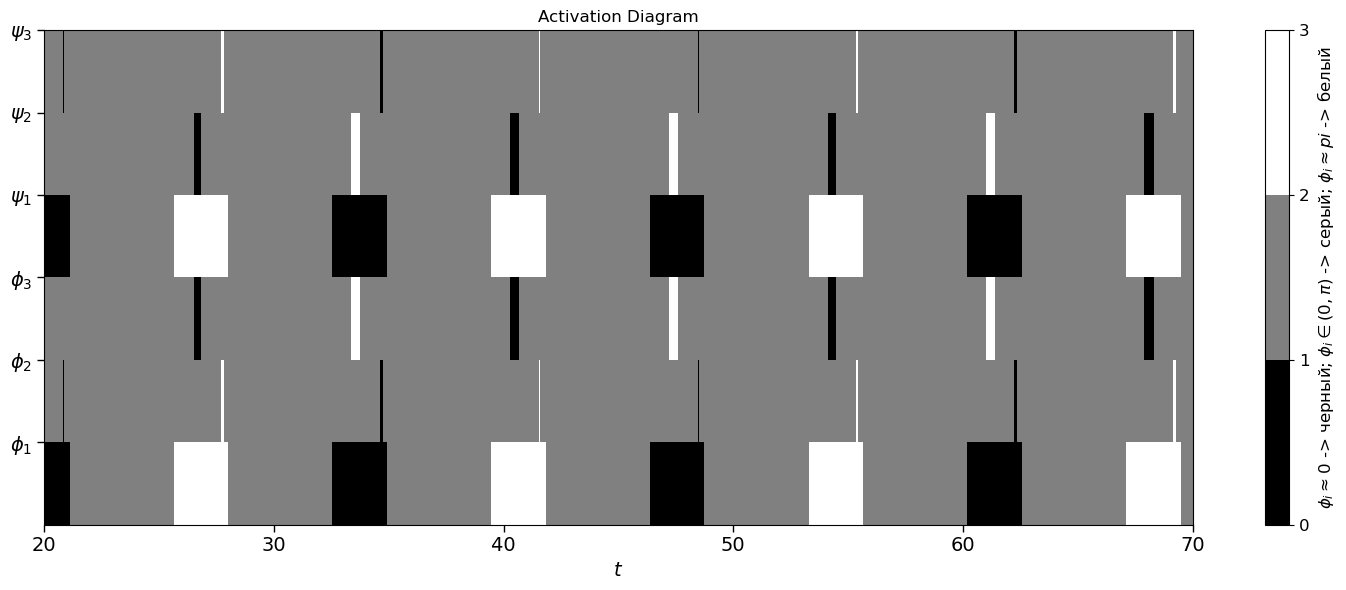

In [74]:
plotActivationDiagram(sol, plot_properties = AD_properties);

### Period

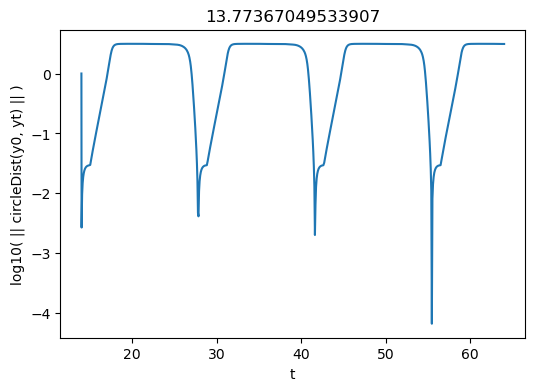

In [104]:
plotNorms(sol)

In [105]:
period = getPeriodTime(sol)

13.77367049533907

### Syncs

In [106]:
syncs = BS_Syncs(sol)

Synchronization: ["phi_1 => psi_1", "phi_2 => psi_3", "phi_3 => psi_2"] with delay: 0.0


---

## Редуцированная система (3 ДУ)

---

In [110]:
Red = BS_ODE_Red(ODE_Parameters, Couple_function, syncs)

time_span = period
ic = [y[1] for y in sol.y[1:3]]

trans_time = 0.0
alg = DP8()
callback = "x -> cos(x[1])"
kwargs = Dict(:dtmax => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)


RedODESolve = ODESolve_Task(Red, time_span, ic; trans_time, alg, callback, kwargs)

[ODE::BS_ODE_Red]: [BS_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::Vector{Real}]: Real[-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]


[time_span::Float64]: 13.77367049533907
[init_cond::Vector{Float64}]: [3.134184958886206, 9.437459693364714, 6.377110733892496]
[trans_time::Float64]: 0.0
[alg::DP8{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}]: DP8(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false))
[callback::String]: x -> cos(x[1])
[kwargs::Dict{Symbol, Any}]: Dict{Symbol, Any}(:maxiters => 1.0e10, :reltol => 1.0e-13, :abstol => 1.0e-13, :dtmax => 0.1)
[solution::Nothing]: nothing


In [111]:
red_sol = RedODESolve()

[t]: 269-element Vector{Float64}
[y]: 3-element Vector{Vector{Float64}} with size 269
[t_events]: 1-element Vector{Vector{Float64}} with size 2
[y_events]: 1-element Vector{Matrix{Float64}} with size 2x3
[retcode]: Success


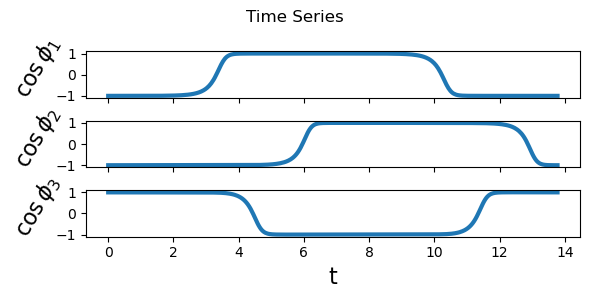

In [112]:
fig = plotTimeSeries(red_sol; plot_properties = TS_properties);

---

## Редуцированная система + система в вариациях (3 + 6х6 ДУ)

---

In [113]:
Duo_tg = TangentODE(Duo, 6)

time_span = period
u0 = [y[1] for y in sol.y[1:6]]
Q0 = diagm(ones(6))

alg = DP8()
kwargs = Dict(:dt => 1e-1, :abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10)

ODESolve = TanODESolve_Task(Duo_tg, time_span, u0, Q0; alg, kwargs)

[ODE::TangentODE]: [ODE::BS_ODE_Duo]: [Forward_ODE::BS_ODE_Sngl]:
[K::Float64]: 1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::Vector{Real}]: Real[-1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Backward_ODE::BS_ODE_Sngl]:
[K::Float64]: -1.5789473684210527
[r::Float64]: 0.39473684210526316
[a2::Float64]: 1.5707963267948966
[a4::Float64]: 3.24685581148453
[P::Vector{Real}]: Real[1.5702078118098561, -1.5789473684210527, -1.2246467991473532e-16]

[Eps::Float64]: 0.1
[Couple::AnonFunc]: #236: x -> 1 - cos(x)


[Jacobian::var"#161#165"{BS_ODE_Duo, Int64}]: #161
[ODEDim::Int64]: 6
[JacDim::Int64]: 6

[time_span::Float64]: 13.77367049533907
[u0::Vector{Float64}]: [3.134184958886206, 9.437459693364714, 6.377110733892496, 3.134184958886206, 6.377110733892496, 9.437459693364714]
[Q0::Matrix{Float64}]: [1.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0;

In [114]:
tansol = ODESolve()

[t]: 425-element Vector{Float64}
[y]: 42-element Vector{Vector{Float64}} with size 425
[t_events]: 1-element Vector{Vector{Float64}} with size 0
[y_events]: 1-element Vector{Matrix{Float64}} with size 0x0
[retcode]: Success


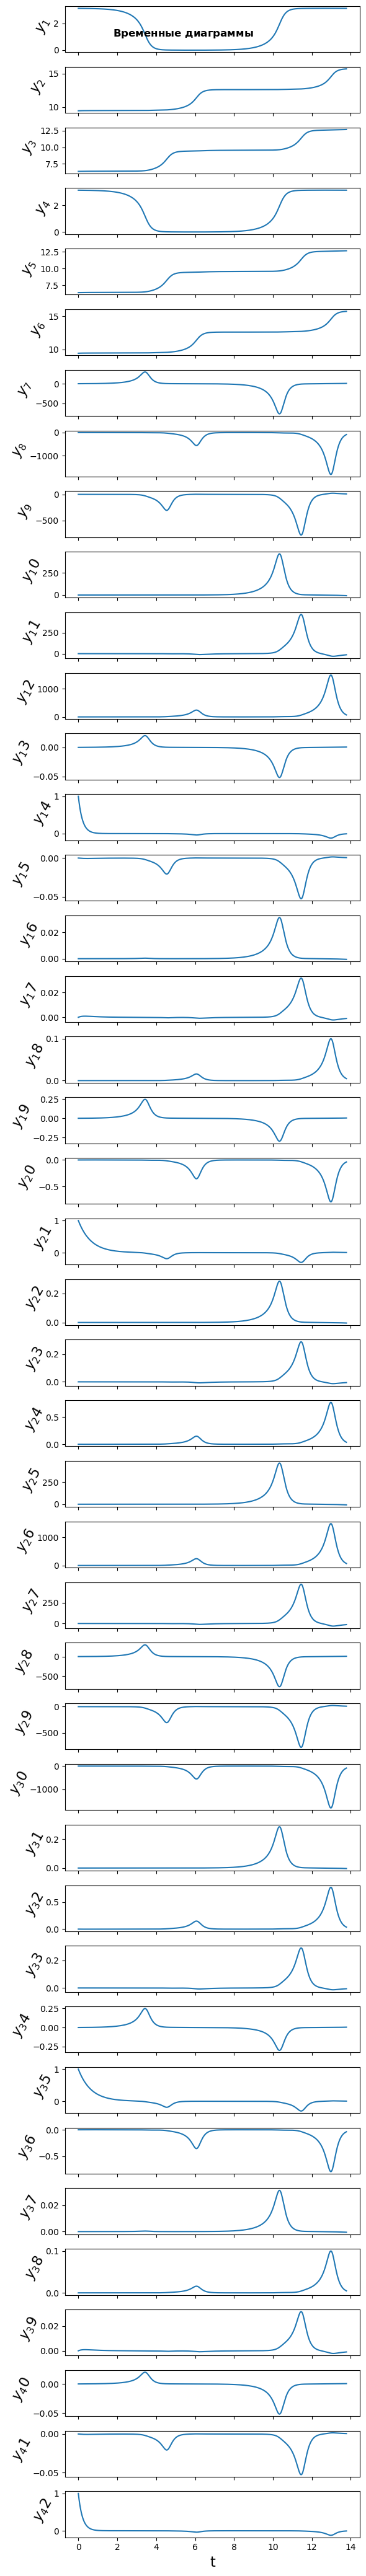

In [115]:
fig = plotTimeSeries(tansol);

In [116]:
mono = reshape([t[end] for t in tansol.y[4:39]], (6, 6))

6×6 Matrix{Float64}:
   3.13466   -7.45463      -0.000502267  …    8.39134      0.00378109
  12.658    -13.6104       -0.000919426       8.76049      0.00519601
  15.714     70.9793        0.00478015      -85.8569      -0.0375464
   8.39134    0.00056611    0.00378109       -0.00373665  -0.000502267
 -85.8569    -0.00579413   -0.0375464         0.0368655    0.00478015
   8.76049    0.000588877   0.00519601   …   -0.00541801  -0.000919426

In [117]:
eigen(mono)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
6-element Vector{ComplexF64}:
    -5.888047351281773 + 0.0im
     -5.75378232073547 - 27.151583556669625im
     -5.75378232073547 + 27.151583556669625im
  -0.48398105786556717 + 0.0im
 -0.010083439774095185 + 0.0im
 1.5115921389974554e-8 + 0.0im
vectors:
6×6 Matrix{ComplexF64}:
 0.00997486+0.0im   -0.0885146-0.0125688im  …   -1.54918e-7+0.0im
  -0.542045+0.0im   -0.0909099-0.0239018im      0.000214087+0.0im
  -0.670375+0.0im     0.950359-0.0im            -0.00109065+0.0im
   0.052756+0.0im   0.00220882-0.02736im        -6.79572e-5+0.0im
  -0.492327+0.0im   -0.0276126+0.278485im      -0.000260443+0.0im
   0.107316+0.0im  -0.00321279-0.0301619im  …      0.999999+0.0im